In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("attacks_limpieza_1.csv", index_col = 0)
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, all onboard were killed by sharks",1800
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,Reported May-28-1797


### EJERCICIO 1 ###

Columna de species: si exploramos esta columna en detalle nos podemos dar cuenta que tenemos muchos valores únicos y esto hace que sea muy difícil trabajar con esta columna. Lo que vamos a hacer es clasificar los tiburones en 5 especies diferentes, las más comunes, que incluyen el tiburón blanco (White), el tiburón tigre (Tiger ), el tiburón gris (Grey), el tiburón limón (Lemon) y el tiburón toro (Bull). El resto de las especies las incluiremos en un único grupo que podremos llamar "Unspecified".

In [35]:
patron_blanco = ".*(hite|HITE).*"
patron_tigre = '.*(iger|IGER).*'
patron_gris = '.*(rey|REY).*'
patron_limon = '.*(emon|EMON).*'
patron_toro = '.*(ull|ULL).*'

In [3]:
copia_df = df.copy()

In [37]:
clase_tiburon = []

def especie_tiburon(x):
    
    especies = copia_df[x]

    for row in especies:
        if re.match(patron_blanco, str(row)):
            clase_tiburon.append('White')
        elif re.match(patron_gris, str(row)):
            clase_tiburon.append('Grey')
        elif re.match(patron_tigre, str(row)):
            clase_tiburon.append('Tiger')
        elif re.match(patron_limon, str(row)):
            clase_tiburon.append('Lemon')
        elif re.match(patron_toro, str(row)):
            clase_tiburon.append('Bull')
        else:
            clase_tiburon.append('Undefined')

In [38]:
especie_tiburon('species_')

In [39]:
copia_df['shark_type'] = clase_tiburon

In [40]:
copia_df.sample()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date,shark_type
4109,1960.11.00.c,1960,Provoked,new guinea,Western District,Toro Passage,NaN,Fisheries trainee,M,NaN,NaN,"1.4 m [4'6""] blacktip shark",http://sharkattackfile.net/spreadsheets/pdf_di...,N,Left wrist bitten by netted shark placed in bo...,Nov-1960,Undefined


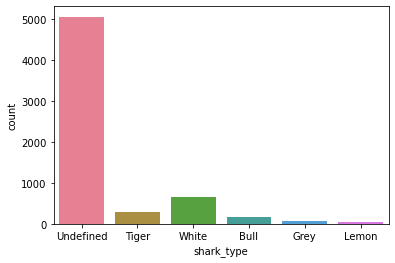

In [41]:
sns.countplot(x="shark_type", data=copia_df, palette="husl");

<font color='pink'> En esta gráfica podemos ver que la mayoría de nuestros datos están incompletos. Aún así, basándonos en los datos que sí tenemos vemos que los principales ataques son de tiburones blancos, seguidos de tiburones tigre y toro..</font>

### EJERCICIO 2 ###

Columna de age: es una columna de tipo string pero debería ser de tipo integer. Además, en esta columna nos vamos a encontrar con algunos errores tipográficos:
 - Edades formato string
 - Edades separadas por &, or, to, >
 - Edades con ?

In [4]:
df.head()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, all onboard were killed by sharks",1800
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,Reported May-28-1797
2,1792.09.12,1792,Provoked,england,NaN,On the Thames River,Fishing,male,M,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, PROVOKED INCIDENT",12-Sep-1792
3,1791.00.00,1791,Unprovoked,australia,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, ""bitten in two""",1791
4,1788.05.10,1788,Boat,australia,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,"No injury to occupants, shark bit oar and rudder",10-May-1788


In [5]:
df['age'].unique()

array([nan, 'young', '14', '19', '20', '15', '21', '27', '36', '25', '6',
       '16', '50', '13 or 14', '57', '11', '48', '18', '52', '12', '32',
       '10', '34', '30', '60', '33', '29', '54', '41', '37', '56', '69',
       '38', '55', '35', '46', '45', '40s', '28', '24', '26', '49', '22',
       '7', '31', '17', '40', '13', '42', '3', '8', '82', '73', '20s',
       '68', '51', '39', '58', 'Teen', '47', '61', '65', '66', '43',
       '60s', '9', '72', '59', '64', '23', '71', '44', '62', '63', '70',
       '18 months', '53', '30s', '50s', 'teen', '77', '74', '28 & 26',
       '5', '86', '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30',
       'Teens', '36 & 26', '8 or 10', '84', '\xa0 ', ' ', '30 or 36',
       '6½', '21 & ?', '75', '33 or 37', 'mid-30s', '23 & 20', ' 30',
       '7      &    31', ' 28', '20?', "60's", '32 & 30', '16 to 18',
       '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '74 ', '45 ',
       '21 or 26', '20 ', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
     

In [6]:
df['age'] = df['age'].astype(str)

In [7]:
patron_edades = r'\d+'          #preguntar si es buena práctica dejarlo fuera de la función

Función

In [8]:
def sacar_edades(col):
    patron_edades = r'\d+'
    x = re.findall(patron_edades, col)
    if len(x) > 0:
        return int(x[0])
    else:
        return np.nan

Aplicamos función

In [9]:
df['age_new'] = df['age'].apply(sacar_edades)


In [10]:
df['age_new'].sample(10)

4636     NaN
193     32.0
1645    30.0
1662    15.0
594     50.0
5654    39.0
2167    17.0
2090    36.0
1564    29.0
1227     NaN
Name: age_new, dtype: float64

In [12]:
df.sample(20)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date,age_new
5762,1897.09.06,1897,Unprovoked,usa,South Carolina,"Elliott Cut, Charleston County",Standing,Allan Fripp,M,nan,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,Lacerations to lower leg,06-Sep-1897,NaN
1656,2006.04.03,2006,Unprovoked,usa,Florida,"Marco Island, Collier County",Wading,Paul Ausum,M,11,12h30,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,Minor injury to right hand & thigh,03-Apr-2006,11.0
3830,1964.07.27,1964,Provoked,usa,Puerto Rico,NaN,NaN,Manuel Alvelo,M,22,11h00,Nurse shark,http://sharkattackfile.net/spreadsheets/pdf_di...,N,Arm lacerated by speared shark PROVOKED INCIDENT,27-Jul-1964,22.0
5797,1895.02.27,1895,Unprovoked,australia,New South Wales,Sydney Harbor,Swimming,James Edward Clifton Donald,M,14,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,27-Feb-1895,14.0
4795,1944.10.25.b,1944,Sea Disaster,philippines,Off Samar Island in the Gulf of Leyte,NaN,USS Johnston DD 557 sunk on 10/24/1944 in the ...,"William Clinton Carter, Jr. & 2 other men",M,nan,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"Clinton was bitten on his back, 2 others did n...",25-Oct-1944,NaN
5985,1879.08.30.R,1879,Sea Disaster,fiji,Lau Group,Totoya,NaN,male + 20,M,nan,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,"Severely bitten on heel, 20 others taken by sh...",Reported 30-Aug-1879,NaN
2789,1990.08.28,1990,Unprovoked,usa,California,"Trinidad Head, Humboldt County",Surfing,Rodney Swan,M,22,16h50,5 m to 6 m [16.5' to 20'] white shark,http://sharkattackfile.net/spreadsheets/pdf_di...,N,4 punctures on leg & board bitten,28-Aug-1990,22.0
3567,1970.01.00,1970,Unprovoked,papua new guinea,New Ireland Province,NaN,Freediving,Mosley,M,15,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,Lacerations to back,Jan-1970,15.0
1835,2004.05.22.a,2004,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",Wading,Naiane Barbosa Bringel,F,24,16h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,Hips & thighs bitten,22-May-2004,24.0
2613,1994.02.13,1994,Provoked,usa,Hawaii,Kailua Bay,Fishing,J. Magbanua,M,nan,17h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,Arm bitten while trying to secure shark caught...,13-Feb-1994,NaN


No ha hecho falta que utilizásemos el método explode() porque con nuestro patrón de regex hemos establecido que solo coja los primeros números que encuentre. Por tanto, a la hora de ver los datos en la columna age_new no había dos en una misma fila.

EJERCICIO 3: Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio.

In [61]:
df.to_csv('attacks_limpieza_2.csv')